In [27]:
#Import Libraries Required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix,RocCurveDisplay
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [2]:
# Load Datasets given for the project bank-additional-full.csv and bank-full.csv

data1 = pd.read_csv("bank-additional-full.csv")
data2 = pd.read_csv("bank-full.csv")

#Loading the testing dataset which is given for test purposes
test1=pd.read_csv("bank-additional.csv")
test2=pd.read_csv("bank.csv")

In [3]:
#Print the first few rows present in the both datasets
data1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#Print the first few rows present in the 2nd dataset
data2.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#print the info for both the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#print the info output for 2nd dataset
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#Missing the values present in the dataset
data1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
#Missing the values present in the data2 set
data2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

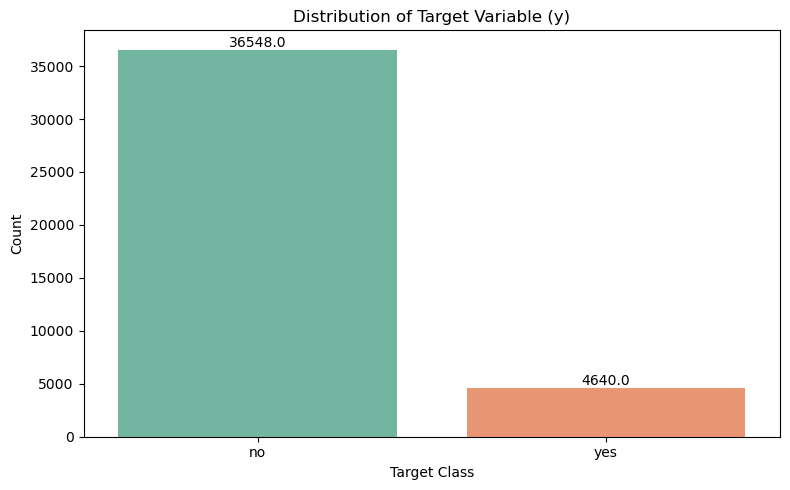

In [9]:
#check the distribution of the output variable 'y' in the dataset
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='y', data=data1, palette='Set2',hue='y')

#Add count annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

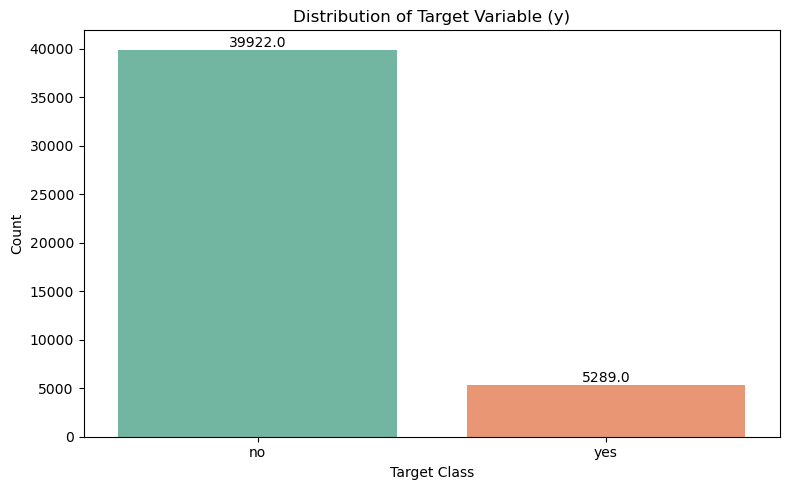

In [10]:
#check the distribution of the output variable 'y' in the dataset
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='y', data=data2, palette='Set2',hue='y')

#Add count annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
#drop the extra columns present in the datasets to merge them for model Building
data1=data1.drop(columns=['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','day_of_week'],axis=1)
data2=data2.drop(columns=['day','balance'],axis=1)
test1=test1.drop(columns=['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','day_of_week'],axis=1)
test2=test2.drop(columns=['day','balance'],axis=1)

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.2+ MB


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
 7   contact    41188 non-null  object
 8   month      41188 non-null  object
 9   duration   41188 non-null  int64 
 10  campaign   41188 non-null  int64 
 11  pdays      41188 non-null  int64 
 12  previous   41188 non-null  int64 
 13  poutcome   41188 non-null  object
 14  y          41188 non-null  object
dtypes: int64(5), object(10)
memory usage: 4.7+ MB


In [14]:
data=pd.concat([data1,data2])
test=pd.concat([test1,test2])
data['y'] = data['y'].map({'yes': 1, 'no': 0})
test['y'] = test['y'].map({'yes': 1, 'no':0})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86399 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        86399 non-null  int64 
 1   job        86399 non-null  object
 2   marital    86399 non-null  object
 3   education  86399 non-null  object
 4   default    86399 non-null  object
 5   housing    86399 non-null  object
 6   loan       86399 non-null  object
 7   contact    86399 non-null  object
 8   month      86399 non-null  object
 9   duration   86399 non-null  int64 
 10  campaign   86399 non-null  int64 
 11  pdays      86399 non-null  int64 
 12  previous   86399 non-null  int64 
 13  poutcome   86399 non-null  object
 14  y          86399 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 10.5+ MB


In [15]:
#Check if the merged dataset doesn't have any null values present
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
# Step 3: Basic Exploration
print("Dataset Shape:", data.shape)
print(data['y'].value_counts())

Dataset Shape: (86399, 15)
y
0    76470
1     9929
Name: count, dtype: int64


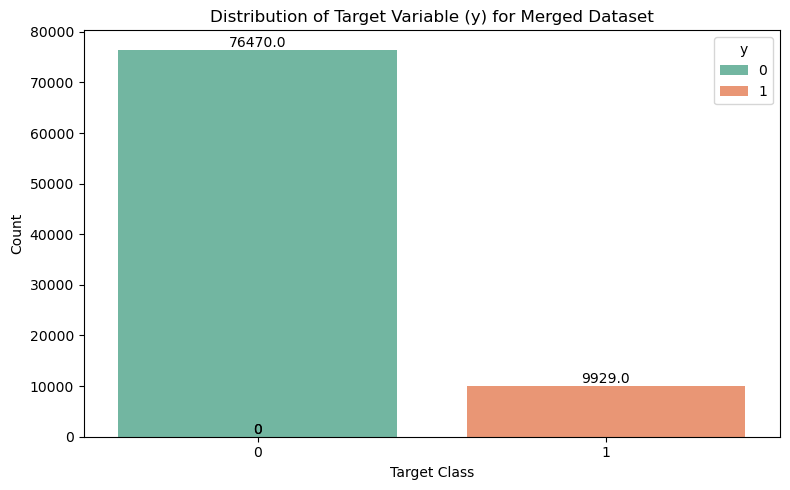

In [49]:
#Performing the Visualization Plot of the Merged Dataset
#check the distribution of the output variable 'y' in the dataset
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='y', data=data, palette='Set2',hue='y')

#Add count annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Distribution of Target Variable (y) for Merged Dataset')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
#Festch the categorical and also numerical values in the dataset
cat_cols=data.select_dtypes(exclude='number').columns
num_cols=data.select_dtypes(include='number').columns

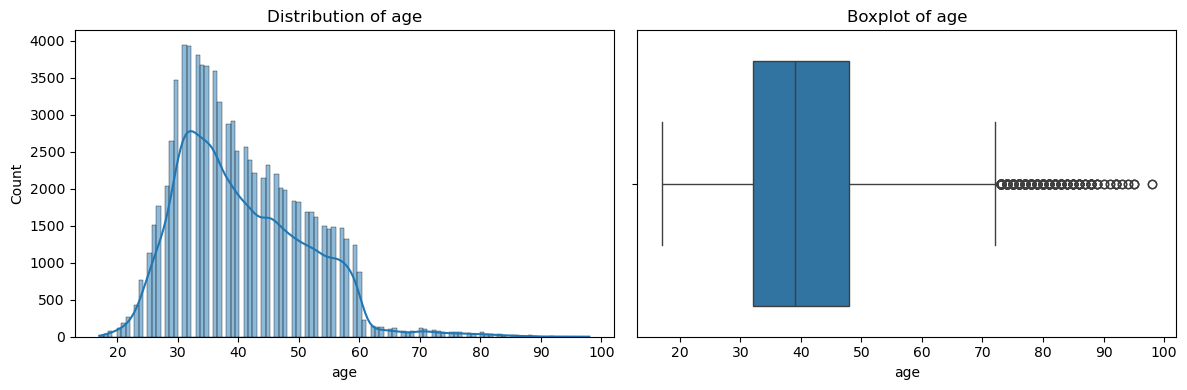

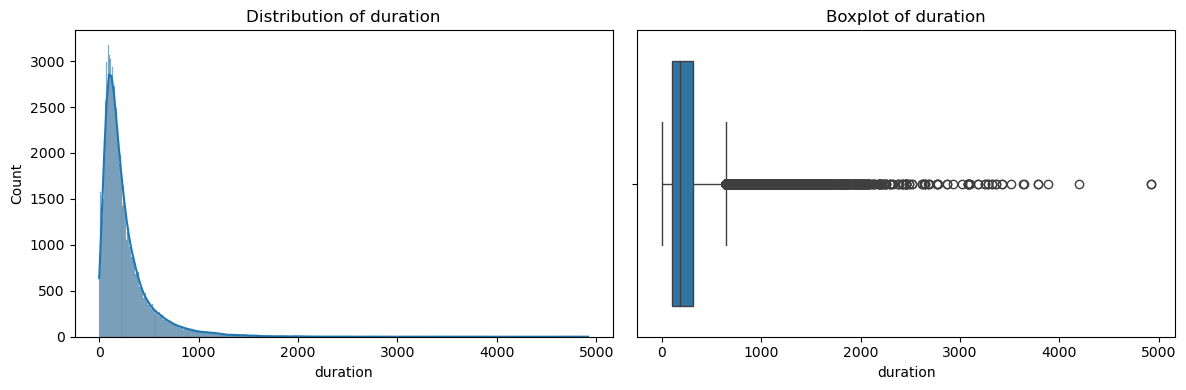

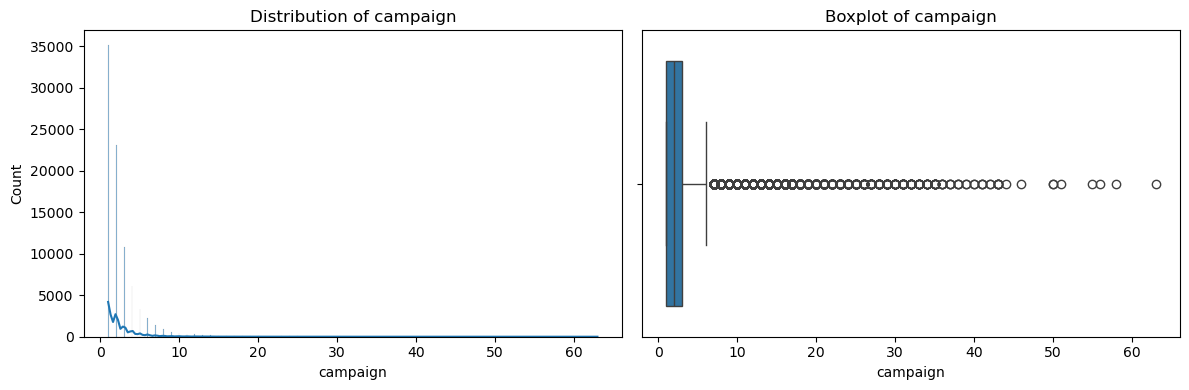

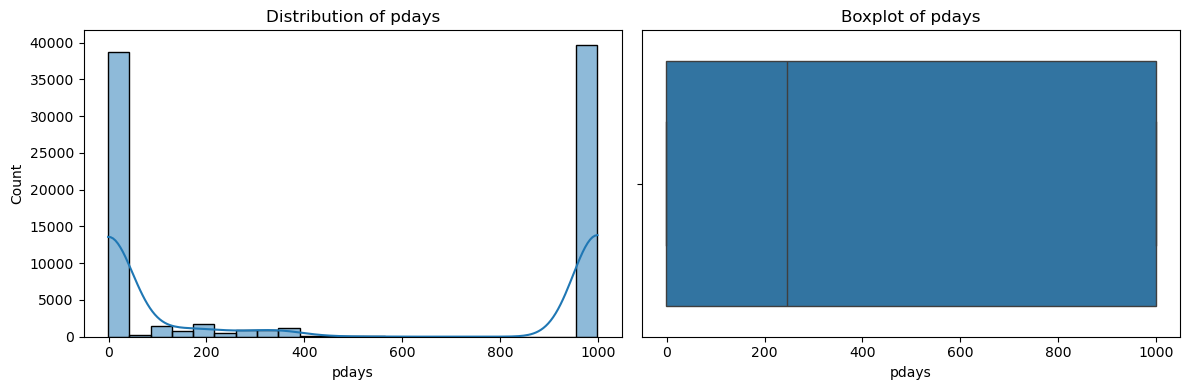

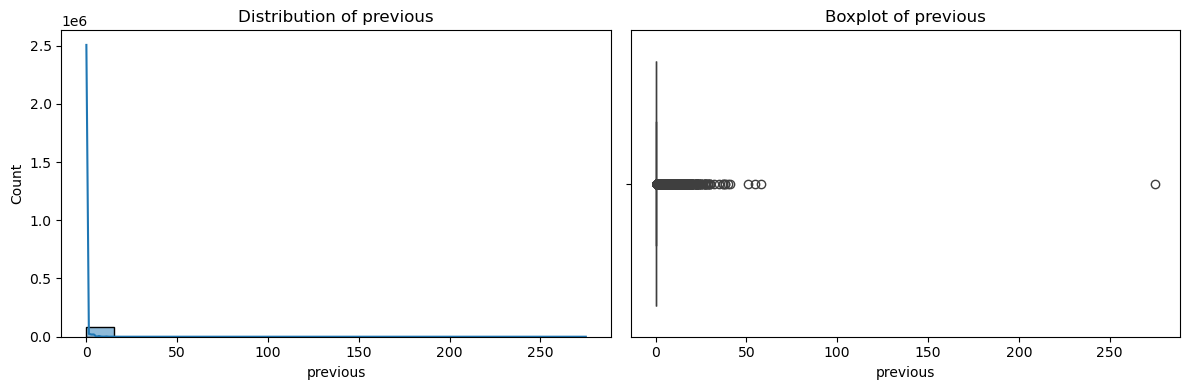

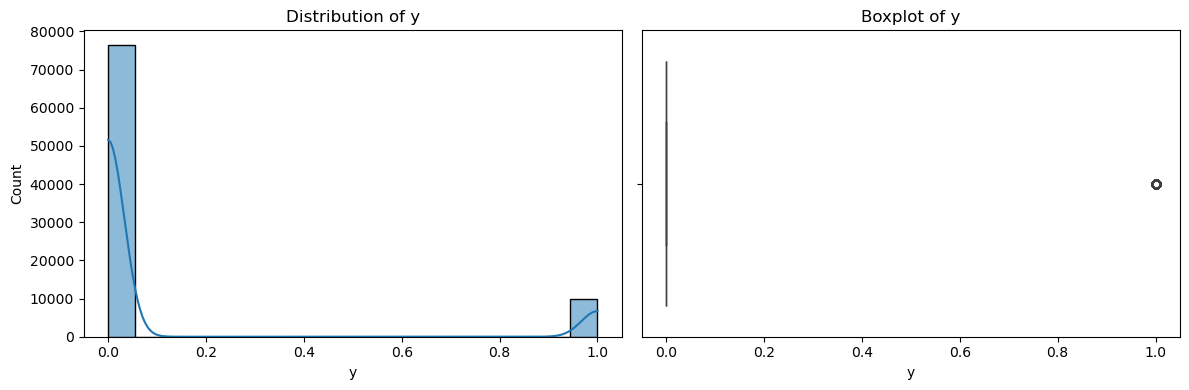

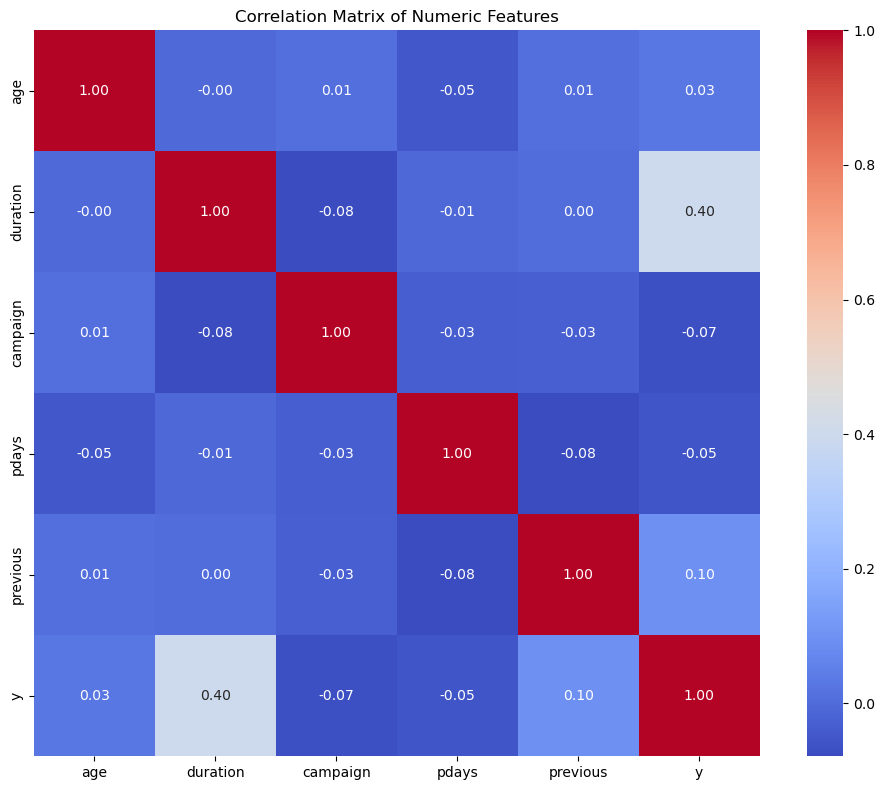

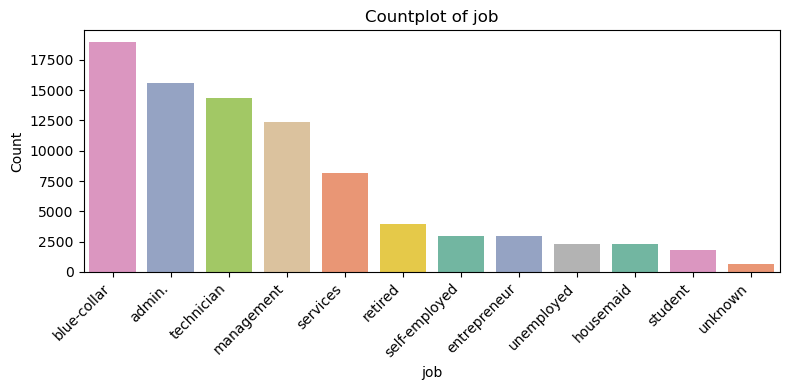

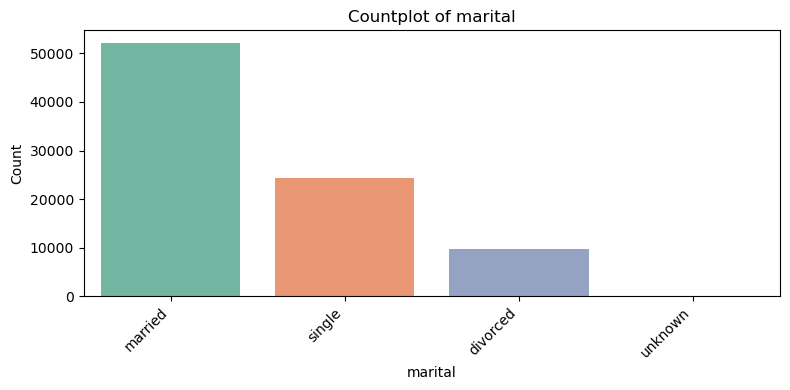

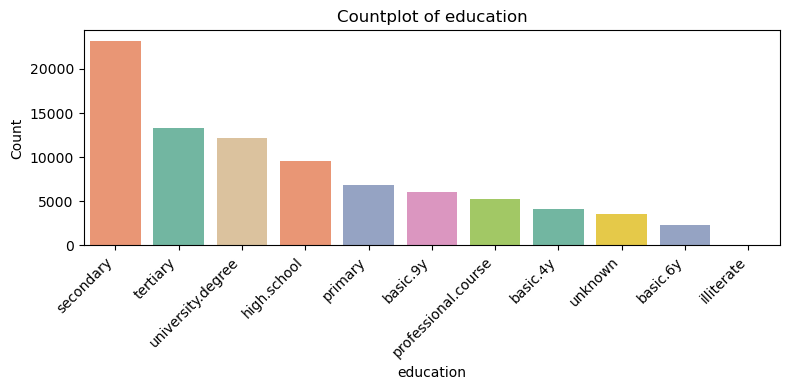

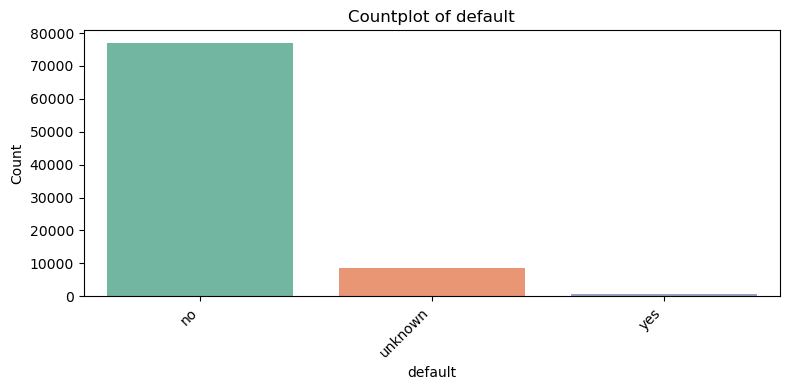

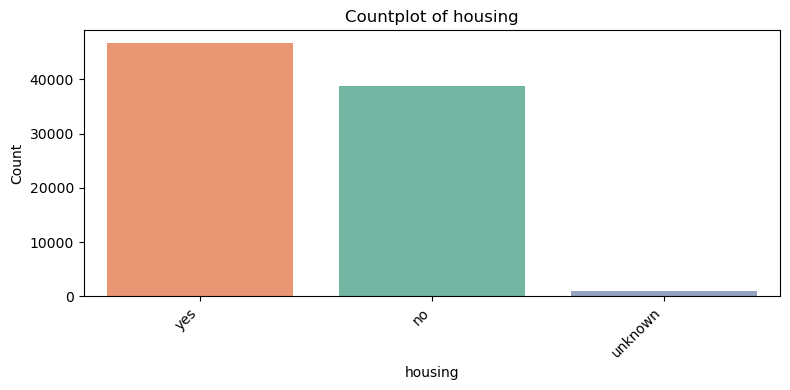

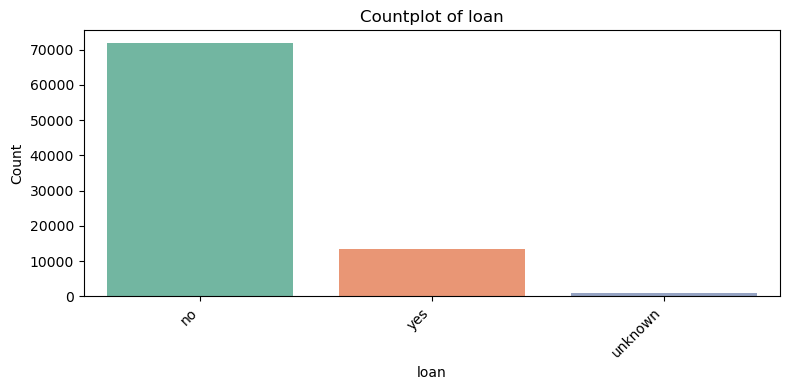

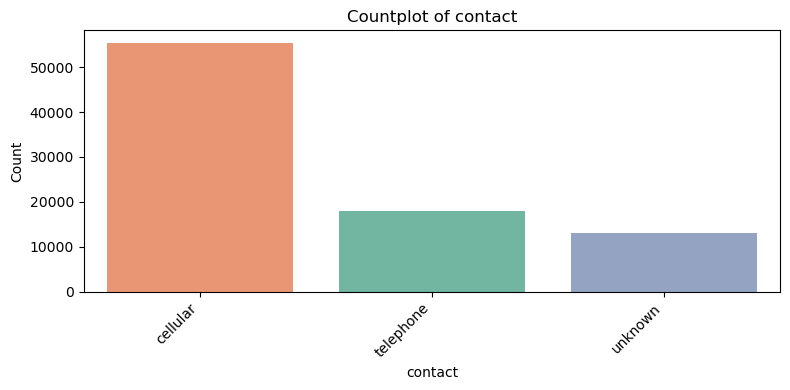

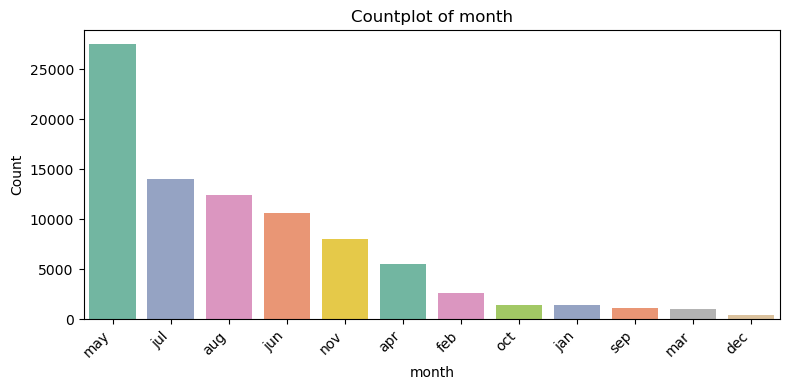

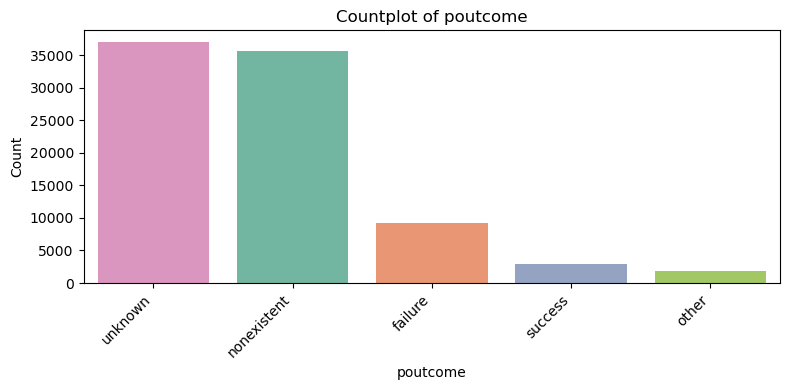

In [75]:
# Showing Numeric feature distributions using for loop
for col in num_cols:
    plt.figure(figsize=(12, 4))
    
    # histogram + KDE plot for each column
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    # boxplot for each column 
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Correlation matrix for the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_cols].corr(),annot=True,fmt='.2f',cmap='coolwarm',square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# showing visualization for Categorical feature counts using for loop
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col,data=data,hue=col,order=data[col].value_counts().index,palette='Set2',legend=False)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [17]:
# 1) Split X/y from your original DataFrame `df`
X_train = data.drop('y', axis=1)
y_train = data['y']
X_test = test.drop('y', axis=1)
y_test = test['y']

Class distribution after SMOTE:
y
No     76470
Yes    76470
Name: count, dtype: int64



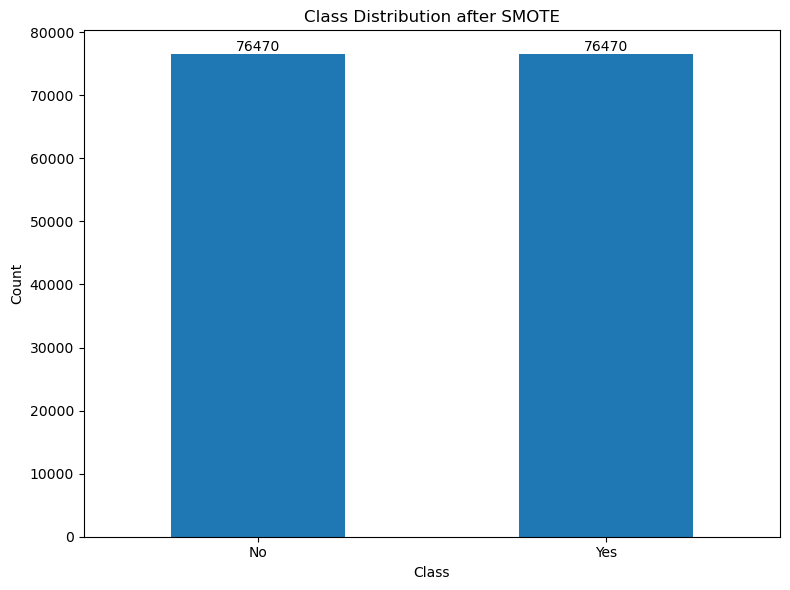

In [63]:
# Fetch the categorical and numerical feature names
numeric_feats     = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_feats = X_train.select_dtypes(include=['object','category']).columns.tolist()

# Build the ColumnTransformer
preprocessor = ColumnTransformer([('num', StandardScaler(),numeric_feats),('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats)])

# Peform the transform your training data and testing data
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre  = preprocessor.transform(X_test)

# Balance with SMOTE to make sure there are no distribution difference
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_pre, y_train)

y_series = pd.Series(y_train_bal).map({0: 'No', 1: 'Yes'})

# counts in the desired order
counts = y_series.value_counts().reindex(['No', 'Yes'])

# Print raw counts after SMOTE
print("Class distribution after SMOTE:")
print(counts, end="\n\n")

# 5) Plot
plt.figure(figsize=(8, 6))
ax = counts.plot(kind='bar')
plt.title('Class Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 6) Annotate counts on bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

In [24]:
#Initialize the Decision Tree Model 
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(max_depth=5, random_state=42)

Decision Tree Classification Report
              precision    recall  f1-score   support

          No       0.98      0.75      0.85      7668
         Yes       0.31      0.88      0.46       972

    accuracy                           0.76      8640
   macro avg       0.64      0.81      0.65      8640
weighted avg       0.90      0.76      0.80      8640

Accuracy : 0.7635
Precision: 0.3073
Recall   : 0.8786
F1 Score : 0.4553
ROC AUC  : 0.8732


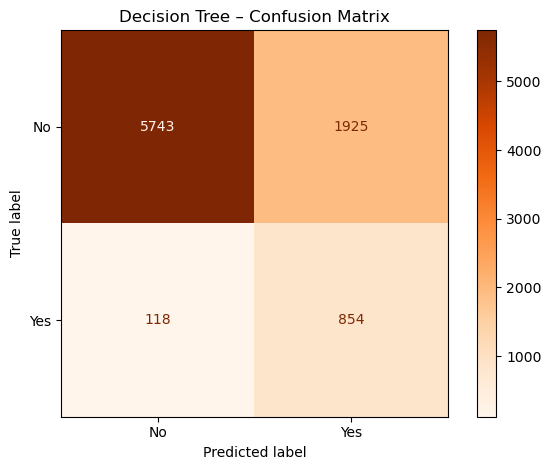

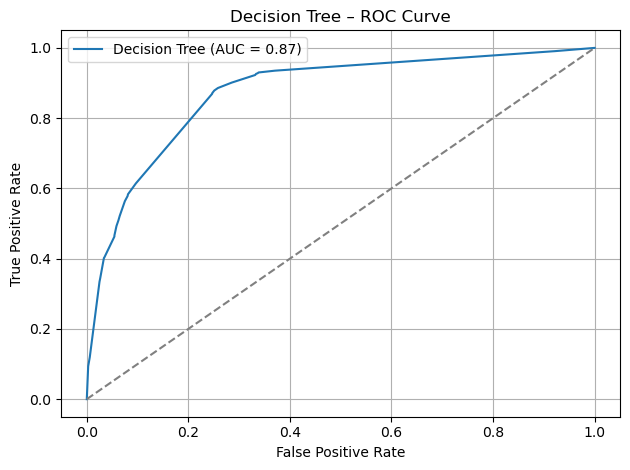

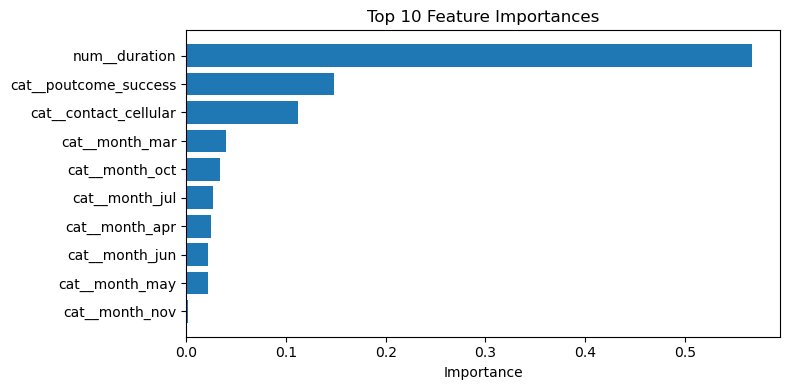

In [67]:
#Predict the model after training
y_pred_dt   = dt_model.predict(X_test_pre)
y_proba_dt  = dt_model.predict_proba(X_test_pre)[:, 1]

# Classification report for Decision Tree Model
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt, target_names=['No','Yes']))

#Evaluation metrics for the Classification Model
accuracy_dt  = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt    = recall_score(y_test, y_pred_dt)
f1_dt        = f1_score(y_test, y_pred_dt)
roc_auc_dt   = roc_auc_score(y_test, y_proba_dt)

print(f"Accuracy : {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall   : {recall_dt:.4f}")
print(f"F1 Score : {f1_dt:.4f}")
print(f"ROC AUC  : {roc_auc_dt:.4f}")

# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(cm_dt, display_labels=['No','Yes'])
disp.plot(cmap='Oranges')
plt.title("Decision Tree – Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC curve for the Decision Tree Model
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree – ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Top-10 Feature Importances as a bar graph for representational purposes
importances   = dt_model.feature_importances_
feat_names    = preprocessor.get_feature_names_out()
idx_sorted    = np.argsort(importances)[::-1][:10]
top_feats     = feat_names[idx_sorted]
top_imports   = importances[idx_sorted]

plt.figure(figsize=(8,4))
plt.barh(np.arange(len(top_feats))[::-1], top_imports)
plt.yticks(np.arange(len(top_feats))[::-1], top_feats)
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

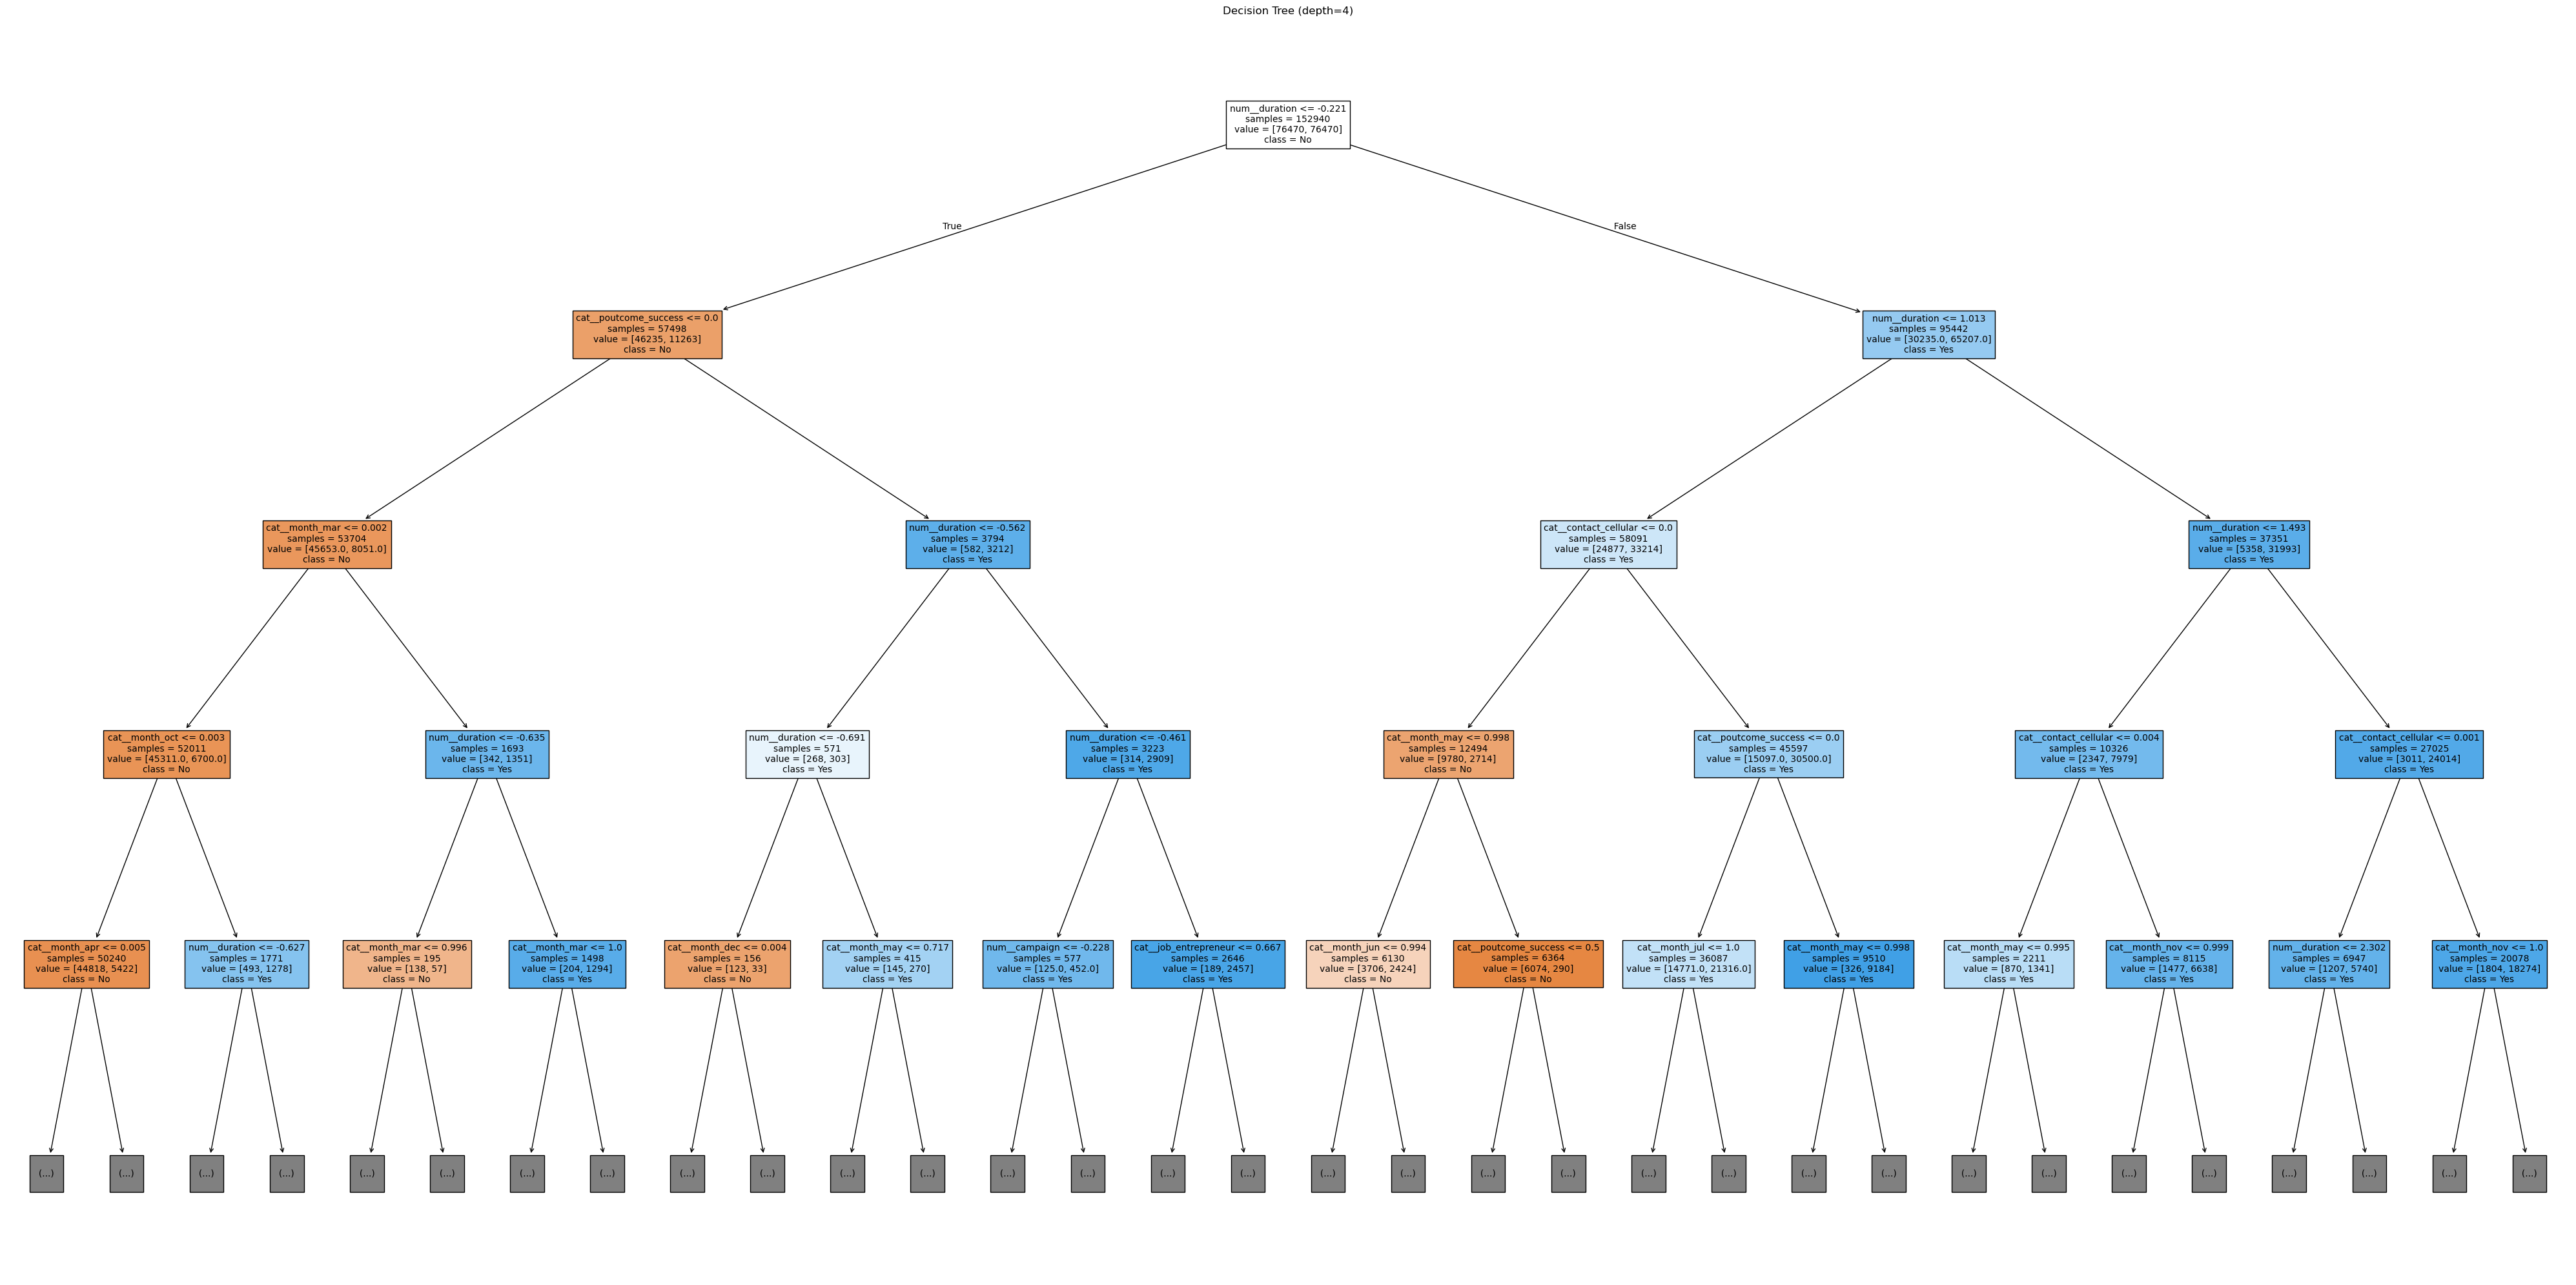

In [47]:
# Visualize the tree structure for representation of Decision Tree Model
plt.figure(figsize=(40,20))
plot_tree(
    dt_model,
    feature_names=preprocessor.get_feature_names_out(),
    class_names=['No','Yes'],
    filled=True,
    impurity=False,
    max_depth=4,
    fontsize=10
)
plt.title("Decision Tree (depth=4)")
plt.tight_layout()
plt.show()
